- Most of the code is based on Hands on ML book [link](https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb)

# Content 

- 

#  Generate Data

In [5]:
# Modules
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

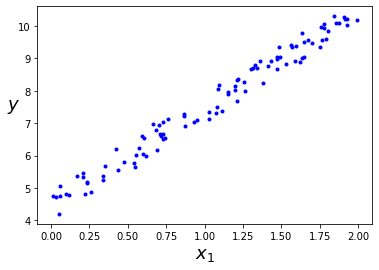

In [10]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0,fontsize=18)
#plt.axis()
plt.show()

# Linear Regression using Batch Gradient Descent 

In [14]:
X_b = np.c_[np.ones((100, 1)), X]

X_b[:10]

array([[1.        , 1.25412656],
       [1.        , 1.49058095],
       [1.        , 1.20822092],
       [1.        , 0.17176992],
       [1.        , 1.78029662],
       [1.        , 0.03203348],
       [1.        , 1.63485936],
       [1.        , 0.05921348],
       [1.        , 0.23536138],
       [1.        , 0.33851294]])

In [25]:
def mse(y, y_h):
    return np.square(np.subtract(y, y_h)).mean()

In [26]:
Y_true = [1,1,2,2,4]  # Y_true = Y (original values) 
  
# Calculated values 
Y_pred = [0.6,1.29,1.99,2.69,3.4] 

mse(Y_pred, Y_true)

0.21606

In [285]:
lr = 0.1
n_iter = 1000
m = 100 # number of instances

# weights
theta = np.random.randn(2, 1)
theta_path_bgd = []
for iteration in range(n_iter):
    
    # The whole batch at once
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # gradients of mse
    theta = theta - lr*gradients
    theta_path_bgd.append(theta)
    
    if iteration < 100:
        if iteration % 10 == 0:
            y_h = X_b.dot(theta)
            print(mse(y, y_h))
print('Final Theta:', theta)

19.375728488885883
0.46096854256817127
0.2881711630879053
0.19166451665413267
0.1377375086219607
0.10760360265580621
0.09076505881826658
0.08135583855696997
0.07609805458349955
0.07316005424510887
Final Theta: [[4.50544611]
 [2.97309543]]


[]

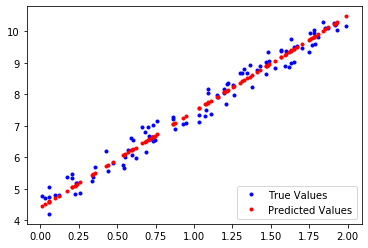

In [145]:
plt.plot(X, y, 'b.', label='True Values')
plt.plot(X, y_h, 'r.', label='Predicted Values')
plt.legend(loc='lower right')
plt.show()

[]

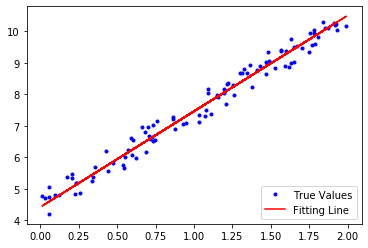

In [139]:
plt.plot(X, y, 'b.', label='True Values')
plt.plot(X, y_h, 'r-', label='Fitting Line')
plt.legend(loc='lower right')
plt.show()

In [140]:
def plot_gd_lrs(theta, lr):
    n_iter = 1000
    m = 100

    print('\nLearning Rate:', lr)
    for iteration in range(n_iter):
        # Plot the learnt line
        if iteration < 10:
            y_h = X_b.dot(theta)
            plt.plot(X, y, 'b.')
            plt.plot(X, y_h, 'r-', linewidth=1)
            plt.xlabel('$x_1$', fontsize=18)
            plt.ylabel('y', rotation=0, fontsize=18)
            plt.title(f'lr: {lr}', fontsize=18)
            plt.show()

        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - lr * gradients
    print("Theta After 1000 iterations:\n", theta)
    print('-'*50)


Learning Rate: 0.02
Theta After 1000 iterations:
 [[4.50264347]
 [2.97538199]]
--------------------------------------------------

Learning Rate: 0.1
Theta After 1000 iterations:
 [[4.50544611]
 [2.97309543]]
--------------------------------------------------

Learning Rate: 0.5
Theta After 1000 iterations:
 [[-1.10276463e+110]
 [-1.35165915e+110]]
--------------------------------------------------


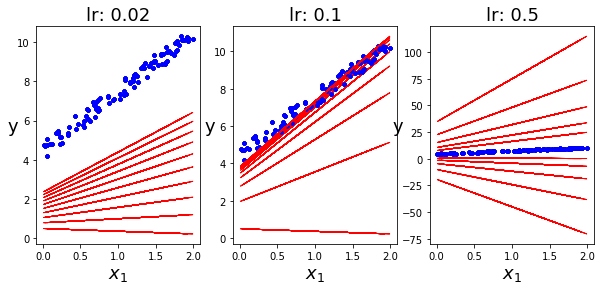

In [141]:
np.random.seed(42)
lrs = [0.02, 0.1, 0.5]
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))
x=131
for lr in lrs:
    plt.subplot(x);
    plot_gd_lrs(theta, lr)
    x+=1

# Stochastic Gradient Descent

In [143]:
m = len(X_b)
np.random.seed(42)

In [214]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [217]:
X_new

array([[0],
       [2]])

In [218]:
 X_new_b

array([[1., 0.],
       [1., 2.]])

In [239]:
def learning_schedule(t):
    return t0 / (t + t1)

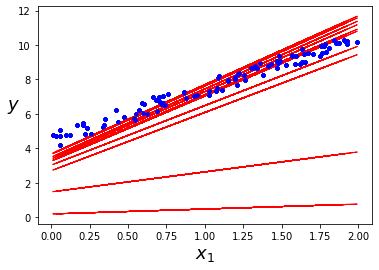

In [284]:
def stochasticGD(n_epochs=50, lr_schedule=True):
    theta_path_sgd=[]
    t0, t1 = 5, 50
    lr = 0.4

    theta = np.random.randn(2, 1)

    for epoch in range(n_epochs):
        for i in range(m):
            if epoch == 0 and i < 10:
                y_h = X_b.dot(theta)
                plt.plot(X, y, 'b.')
                plt.plot(X, y_h, 'r-', linewidth=1)
                plt.show()

            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            gradients = 2* xi.T.dot(xi.dot(theta) - yi)
            if lr_schedule:
                lr = learning_schedule(epoch * m + i)
            theta = theta - lr * gradients
            theta_path_sgd.append(theta)
    plt.plot(X, y, 'b.')
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.show()
    return theta_path_sgd

# LR Annealing 
theta_path_sgd = stochasticGD(50)

In [235]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [236]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.47269457]), array([2.99079656]))

# Mini-Batch Gradient Descent 

In [282]:
def mini_batch_SG(n_epochs=50):
    theta_path_mgd = []
    mini_batch_size = 20
    np.random.seed(42)
    theta = np.random.randn(2, 1)
    
    t0, t1 = 200, 1000
    
    t = 0
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        x_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, mini_batch_size):
            t += 1
            xi = x_b_shuffled[i:i+mini_batch_size]
            yi = y_shuffled[i:i+mini_batch_size]
            gradients = 2/mini_batch_size * xi.T.dot(xi.dot(theta) - yi)
            lr = learning_schedule(t)
            theta = theta - lr * gradients
            
            theta_path_mgd.append(theta)
            
        # plot once per mini-batch
        if epoch < 10:
            y_h = X_b.dot(theta)
            plt.plot(X, y, 'b.')
            plt.plot(X, y_h, 'r-', linewidth=1)
            plt.show()
    return theta_path_mgd

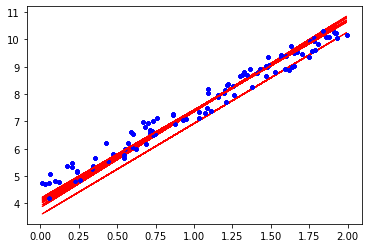

In [300]:
theta_path_mgd = mini_batch_SG(100)

In [301]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Text(0, 0.5, '$\\theta_1$')

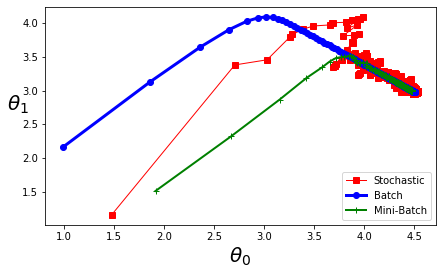

In [310]:
plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth=1, label='Stochastic')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o', linewidth=3, label='Batch')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth=2, label='Mini-Batch')

plt.legend(loc='lower right')
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", rotation=0, fontsize=20)

# Polynomial Regression 

In [311]:
np.random.seed(42)

In [314]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
# polynomial function + guassian noise
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

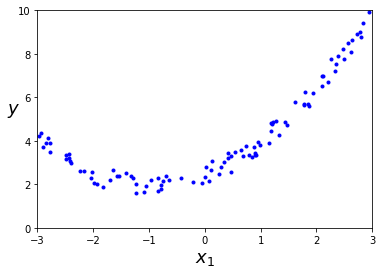

In [325]:
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [316]:
# Generate Polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[:3]

array([[ 0.85218988],
       [-2.49516021],
       [-2.03022772]])

In [317]:
X_poly[:3]

array([[ 0.85218988,  0.72622759],
       [-2.49516021,  6.22582447],
       [-2.03022772,  4.12182458]])

In [318]:
np.square(X[:3])

array([[0.72622759],
       [6.22582447],
       [4.12182458]])

In [320]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.47268296]), array([[0.96479303, 0.50720329]]))

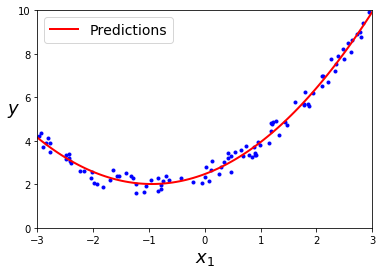

In [337]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3,3,0, 10])
plt.show()

## Polynomial Degrees 

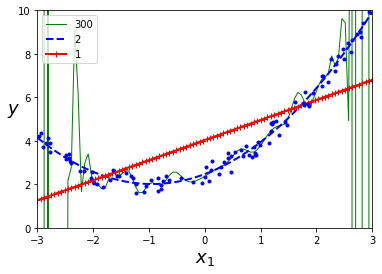

In [346]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    # Pipeline
    polynomial_regression = Pipeline([
        ('poly_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg)
    ])
    
    # Training and Plotting 
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# Learning Curves  

In [371]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        val_errors.append(mean_squared_error(y_val_pred, y_val))
        train_errors.append(mean_squared_error(y_train_pred, y_train[:m]))
        
    val_errors, train_errors = np.sqrt(val_errors), np.sqrt(train_errors)
    plt.plot(train_errors, 'r-+', linewidth=2, label='Train')
    plt.plot(val_errors, 'b-', linewidth=3, label='Val')
    plt.legend(loc='upper right')
    plt.xlabel('Training set size', fontsize=18)
    plt.ylabel('RMSE', fontsize=18)

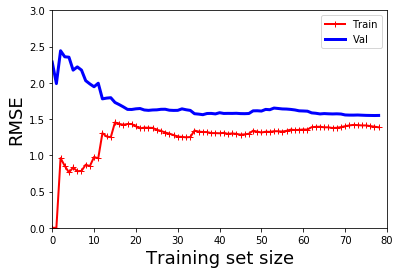

In [372]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

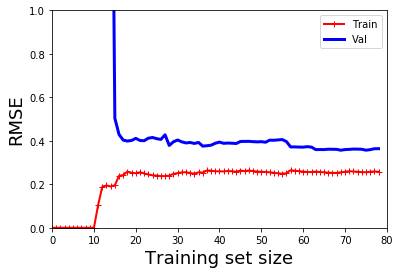

In [376]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', lin_reg)
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 1])
plt.show()